# TASK 1:- PREDICTION USING SUPERVISED ML(Level: Beginner)
## Author: Tiasha Dasgupta
## OBJECTIVE: Predict the percentage of a student based on the no. of study hours

### Importing all libraries required in this notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data from remote link

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [3]:
data.shape

(25, 2)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Plotting the distribution of scores

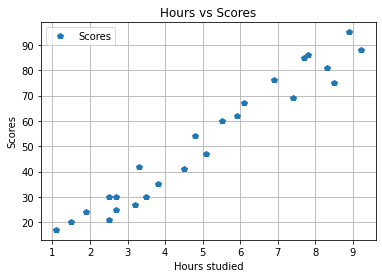

In [7]:
data.plot(x="Hours",y="Scores",style="p")
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.grid()

#### From the graph above, we can clearly see that there is a fairly positive linear relation between the number of hours studied and percentage of score.

### Preparing the data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2) 

### Training the Algorithm

In [11]:
import sklearn
from sklearn.linear_model import LinearRegression

In [12]:
reg=LinearRegression() #creating object/instance

In [13]:
reg.fit(x_train,y_train) #model is created

LinearRegression()

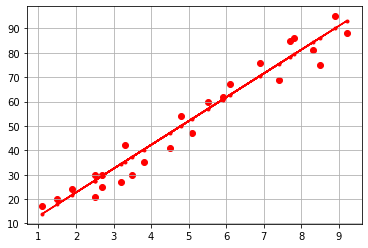

In [14]:
m=reg.coef_
c=reg.intercept_
slope=m*x+c
plt.scatter(x,y,color='r')
plt.plot(x,slope,marker='.',color='r')
plt.grid()

### Making Predictions

In [15]:
y_pred=reg.predict(x_test)

In [16]:
df = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_pred})  
df 

,Actual values,Predicted values
0,75,86.197246
1,21,27.583296
2,86,79.358952
3,30,37.352288
4,30,27.583296


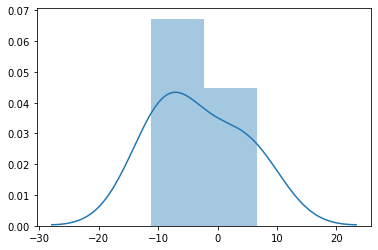

In [17]:
sns.distplot(y_test-y_pred)

In [18]:
hours = 9.25
pred = reg.predict([[hours]])
print("Predicted score for a student who studies for {} hours is {}".format(hours,pred[0]))

Predicted score for a student who studies for 9.25 hours is 93.52398933807197


### Evaluating the model

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 6.838116392714348


In [20]:
Rsquare=reg.score(x_train,y_train)
print("Rsquare value is:",Rsquare)

Rsquare value is: 0.9608363213078247
